In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


# Wrong Predictions

In [2]:
def accuracy(Y_test, pred):
    c, d = 0, 0
    Y_test = Y_test.to_list()
    for i in range(len(Y_test)):
        if Y_test[i] == pred[i]:
                c += 1
        d += 1
    return (c/d) * 100 

# Modelling

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def modelling(X_train, X_test, y_train, Y_test):
    
    model = LogisticRegression(random_state = 0)
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("Logistic Regression Model accuracy = ", round(acc,2), "%")
    
    model = LinearSVC(random_state =2)
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("SVC Model accuracy = ", round(acc,2), "%")
    
    model = GaussianNB()
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("GaussianNB Model accuracy = ", round(acc,2), "%")
    
    model = DecisionTreeClassifier(random_state = 2)
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("Decision Tree = ", round(acc,2), "%")
    
    model = RandomForestClassifier(random_state = 2, n_estimators = 10, criterion = "gini")
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("Random Forest Model accuracy = ", round(acc,2), "%")
    
    model = KNeighborsClassifier(p = 2, n_neighbors = 5)
    model.fit(X_train,y_train)
    acc = accuracy(Y_test,[int(round(i,0)) for i in model.predict(X_test)])
    print("KNN Model accuracy= ", round(acc,2), "%")

# Test, Train splitting and Modelling

In [4]:
def split_modelling(X,y):
    X_train, X_test, Y_train, Y_test = tts(X, y, random_state = 1, test_size = 0.33)
    modelling(X_train, X_test, Y_train, Y_test)

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

sns.set()

# 1. Data Analysis And Plotting

### Data Analysis

In [6]:
reviews  = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
reviews.Score.unique()

array([5, 1, 4, 2, 3])

In [8]:
print(len(reviews.ProductId.unique()), len(reviews.UserId.unique()), "\nshape = ", reviews.shape )

74258 256059 
shape =  (568454, 10)


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [11]:
reviews.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [12]:
reviews  = reviews.dropna()
reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

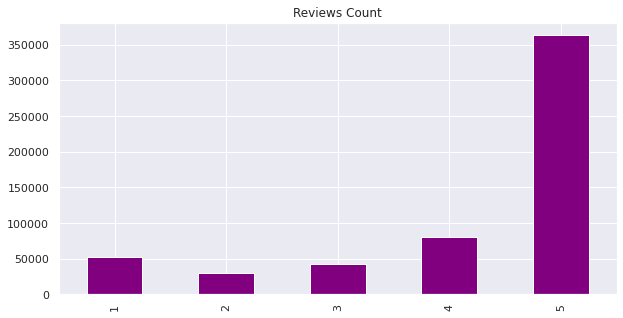

In [13]:
ax = reviews.Score.value_counts().sort_index()
ax.plot(kind = "bar", title = "Reviews Count", figsize = (10,5), color = "purple")
plt.show()

In [14]:
reviews["full_review"] = reviews.Summary + " " + reviews.Text
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,full_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha..."


### Sentiment Analysis

In [15]:
import nltk as nl
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
print(reviews.full_review[3], reviews.Score[1])
sia.polarity_scores(reviews.full_review[3])

Cough Medicine If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal. 1


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
polaritydata = {}
word_count = []

for i, row in  tqdm(reviews.iterrows(), total  = len(reviews)):
    words= nl.word_tokenize(row.full_review)
    word_count.append(len(words))
    
    polaritydata[i] = sia.polarity_scores(row.full_review)
    
df = pd.DataFrame(polaritydata).T
df.head(3)

  0%|          | 0/568411 [00:00<?, ?it/s]

,neg,neu,pos,compound
0,0.000,0.677,0.323,0.9583
1,0.127,0.873,0.000,-0.5664
2,0.087,0.763,0.150,0.8265


In [18]:
df["word_count"] = word_count
df["good"] = (reviews.Score == 5 ) * 1  +  (reviews.Score == 4 ) * 1
df["neutral"] = (reviews.Score == 3) * 1
df["bad"] =  (reviews.Score == 1 ) * 1  +  (reviews.Score == 2 ) * 1
df["Score"] = reviews.Score
df["good_to _bad"] = df["good"] - df["bad"] 

df.head(3)

,neg,neu,pos,compound,word_count,good,neutral,bad,Score,good_to _bad
0,0.000,0.677,0.323,0.9583,55,1,0,0,5,1
1,0.127,0.873,0.000,-0.5664,40,0,0,1,1,-1
2,0.087,0.763,0.150,0.8265,115,1,0,0,4,1


In [19]:
# Removing nuetral reviews

df = df[(df.neutral != 1)]

### Plotting

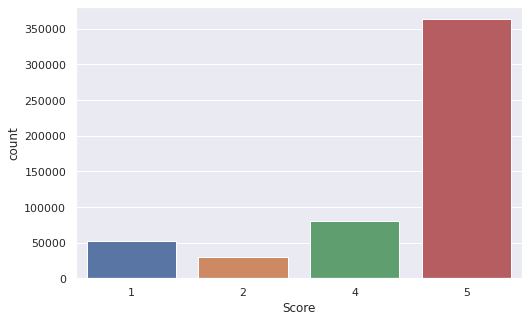

In [20]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data=df, x="Score")

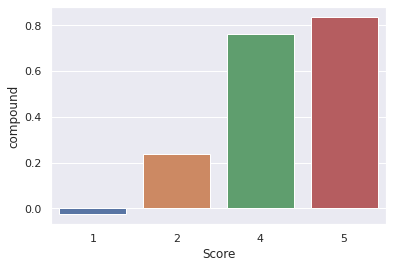

In [21]:
ax = sns.barplot(data = df, x = "Score", y = "compound",  ci = 0)
plt.show()

<AxesSubplot:xlabel='compound', ylabel='pos'>

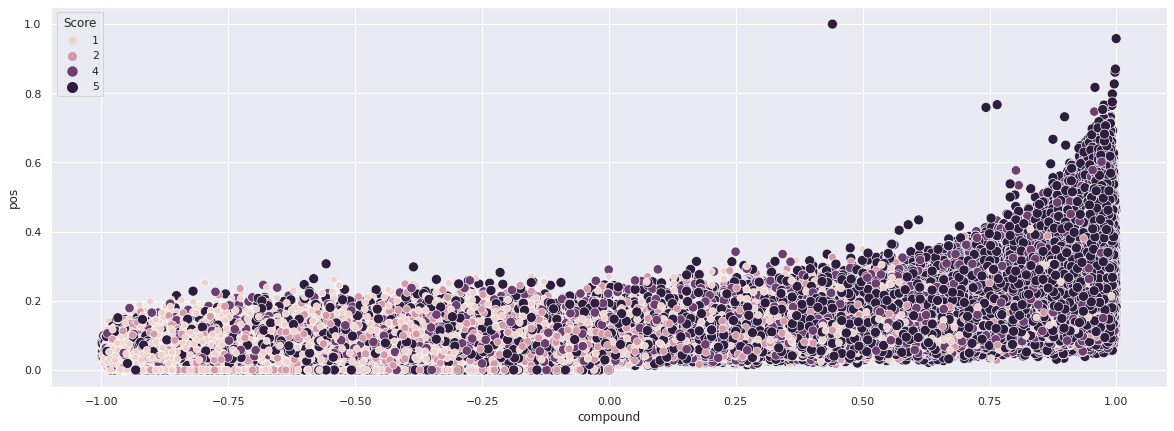

In [22]:
plt.figure(figsize = (20, 7))
sns.scatterplot(data=df, x="compound", y="pos", hue="Score", size="Score", sizes=(50, 100), legend="full")

<AxesSubplot:>

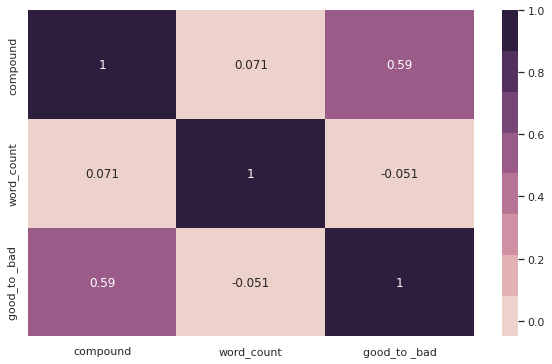

In [23]:
hell = df.iloc[:, [3,4,9]]

plt.figure(figsize = (10,6))
sns.heatmap(hell.corr(), cmap = sns.cubehelix_palette(8),annot = True)

# 2. Making X,y Datasets

### Test 01

In [24]:
X = df.iloc[:, [3]]
y = df.iloc[:, 9]

split_modelling(X,y)

Logistic Regression Model accuracy =  88.76 %
SVC Model accuracy =  88.76 %
GaussianNB Model accuracy =  88.68 %
Decision Tree =  89.28 %
Random Forest Model accuracy =  89.23 %
KNN Model accuracy=  88.67 %


### Test 02

In [25]:
X = df.iloc[:, :4]
y = df.iloc[:, 5]

split_modelling(X,y)

Logistic Regression Model accuracy =  88.64 %
SVC Model accuracy =  88.76 %
GaussianNB Model accuracy =  88.27 %
Decision Tree =  89.37 %
Random Forest Model accuracy =  91.0 %
KNN Model accuracy=  89.72 %


### Test 03

In [26]:
X = df.iloc[:, :5]
y = df.iloc[:, 5]

split_modelling(X,y)

Logistic Regression Model accuracy =  88.63 %


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVC Model accuracy =  88.73 %
GaussianNB Model accuracy =  87.85 %
Decision Tree =  89.43 %
Random Forest Model accuracy =  91.59 %
KNN Model accuracy=  89.79 %


### Test 04

In [27]:
X = df.iloc[:, [3,4]]
y = df.iloc[:, 5]

split_modelling(X,y)

Logistic Regression Model accuracy =  88.78 %


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVC Model accuracy =  87.37 %
GaussianNB Model accuracy =  88.35 %
Decision Tree =  89.26 %
Random Forest Model accuracy =  90.11 %
KNN Model accuracy=  89.72 %
